In [2]:
from __future__ import division
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
from sklearn import linear_model
import math as math
import nsfg
import random
import first
import thinkstats2
import chap01soln
import statsmodels.tsa.stattools as smtsa

In [3]:
preg = nsfg.ReadFemPreg()

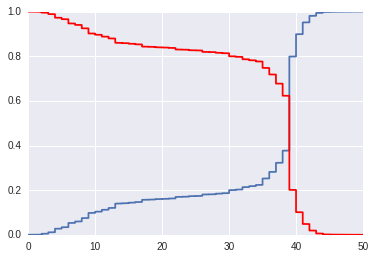

In [4]:
complete = preg.query('outcome in [1,3,4]').prglngth
cdf = np.array(range(complete.shape[0]))/float(complete.shape[0])
complete = complete.sort_values()
plt.plot(complete,cdf)
survival = 1 - cdf

plt.plot(complete,survival,color='red')

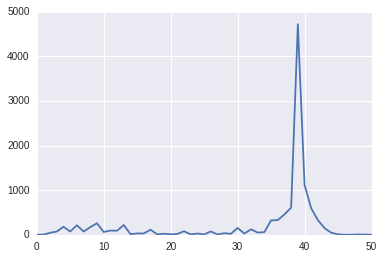

In [5]:
preg_len = complete.value_counts()
preg_len = preg_len.sort_index()
preg_len.plot()


In [6]:
#probability that pregnancy are past 13 months
proba = preg_len[preg_len.index>13]
proba.sum()/preg_len.sum()

0.8602198587898829

In [7]:
#probability that pregnancy are less or equals  13 months
proba = preg_len[preg_len.index<=13]
proba.sum()/preg_len.sum()

0.1397801412101171

### Hazard function

In [8]:
def survival(serie,limit):
    return np.sum(serie[serie.index>limit])/preg_len.sum()

print survival(preg_len,13)
    
def hazardFunction(serie, value):
    return (survival(serie,value)-survival(serie,value+1))/survival(serie,value)

hazardFunction(preg_len,39)



0.86021985879


0.49689440993788825

,prglngth,age_index,survival,delta,hazard_function
39,4718.0,39,0.201448,0.100098,0.496894


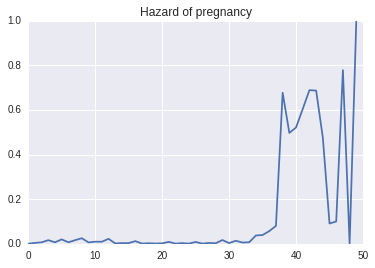

In [63]:
# plot hazard function

#reindex the age of preglength
age_index = np.arange(0,51)
preg_len = preg_len.reindex(age_index).fillna(0)

# rewrite the survival and hazard methods:
def survival_df(x):
    return df_preg_length[df_preg_length.age_index>x].prglngth.sum()/df_preg_length.prglngth.sum()

def hazardFunction_df(x):
    pass
    
# create a DataFrame of index age, number of pregnancy for each age and hazard function as new column

df_preg_length = preg_len.to_frame()
df_preg_length['age_index']= df_preg_length.index

df_preg_length['survival'] = df_preg_length.age_index.apply(survival_df)
df_preg_length['delta']= -df_preg_length.survival.diff()
df_preg_length.delta = df_preg_length.delta.shift(-1)
df_preg_length['hazard_function'] = df_preg_length.delta/df_preg_length.survival

df_preg_length.hazard_function.plot(title="Hazard of pregnancy")
df_preg_length[df_preg_length.age_index==39]

### Kaplan-Meier Estimation

In [64]:
resp = chap01soln.ReadFemResp()

In [69]:
resp.cmmarrhx.replace([9997,9998,9999],np.nan, inplace=True)
resp['agemarry']= (resp.cmmarrhx - resp.cmbirth) /12.0
resp['age']=(resp.cmintvw - resp.cmbirth) / 12.0

In [70]:
complete = resp[resp.evrmarry==1].agemarry
ongoing = resp[resp.evrmarry==0].age

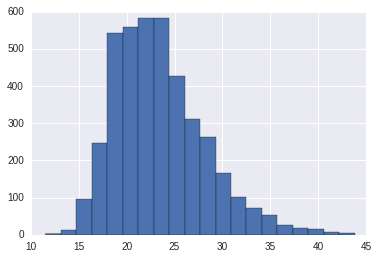

In [92]:
complete_hist = complete.value_counts()
complete_hist = complete_hist.sort_index()
complete.hist(bins=20)
complete=complete.sort_values()
